<h1 align='center'><b><font color='indianred'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [2]:
!kaggle datasets download "uciml/sms-spam-collection-dataset"

100% 211k/211k [00:00<00:00, 753kB/s]
100% 211k/211k [00:00<00:00, 753kB/s]


In [3]:
!unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [4]:
import pandas as pd
spam_df = pd.read_csv('spam.csv', encoding='latin-1')
spam_df = spam_df[['v1','v2']]
spam_df.columns = ['label', 'message']
spam_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
spam_df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
spam_df['label'].value_counts(normalize=True)*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [7]:
spam_df['label'].replace({'ham':0, 'spam':1}, inplace=True)

In [8]:
spam_df['label'].value_counts(normalize=True)*100

0    86.593683
1    13.406317
Name: label, dtype: float64

# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





In [9]:
spam_df_small = spam_df.sample(frac=0.05).reset_index(drop=True)
spam_df_small.head()

,label,message
0,0,"Sorry pa, i dont knw who ru pa?"
1,0,Ok. How many should i buy.
2,0,I've reached home finally...
3,0,Let me know if you need anything else. Salad o...
4,1,"Thanks for your ringtone order, reference numb..."


In [10]:
spam_df_small['label'].value_counts(normalize=True)*100

0    85.663082
1    14.336918
Name: label, dtype: float64

`df.sample` was able to create a stratified sample without specificying. If this wasn't the case I would try using methods mention in this [article](https://www.statology.org/stratified-sampling-pandas/).

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
X = spam_df_small['message'].values
y = spam_df_small['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,shuffle=True)
print(X_train[:5])
print(y_train[:5])
print(X_test[:5])
print(y_test[:5])

['Ok. Not much to do here though. H&M Friday, cant wait. Dunno wot the hell im gonna do for another 3 weeks! Become a slob- oh wait, already done that! '
 "And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed"
 'ALSO TELL HIM I SAID HAPPY BIRTHDAY' 'Its sarcasm.. .nt scarcasim'
 'Oi. Ami parchi na re. Kicchu kaaj korte iccha korche na. Phone ta tul na. Plz. Plz.']
[0 0 0 0 0]
[' &lt;#&gt;  in mca. But not conform.'
 'I know you are. Can you pls open the back?'
 'Do you hide anythiing or keeping distance from me'
 'They are just making it easy to pay back. I have  &lt;#&gt; yrs to say but i can pay back earlier. You get?'
 'Thats cool princess! I will cover your face in hot sticky cum :)']
[0 0 0 0 0]


In [12]:
import sys
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -U nltk -qq
    !pip install -U spacy -qq
    !pip install -U scikit-optimize -qq
    !python -m spacy download en_core_web_sm -qq
    !pip install pyspellchecker -qq
    !pip install optuna -qq

    basepath = '/content/drive/MyDrive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing'
    sys.path.append('/content/drive/MyDrive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Custom_files')
else:
    basepath = '/home/harpreet/Insync/google_drive_shaannoor/data'
    sys.path.append(
        '/home/harpreet/Insync/google_drive_shaannoor/data/custom-functions')

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
from pathlib import Path
base_folder = Path(basepath)
data_folder = base_folder/'0_Data_Folder'
model_folder = base_folder/'models/spam'
custom_functions = base_folder/'custom-functions'

In [23]:
import CustomPreprocessorSpacy as cp
from FeaturizerSpacy_w_SpellChecker import ManualFeatures
from plot_learning_curve import plot_learning_curve

In [15]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [16]:
disabled = nlp.select_pipes(
    disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])


def spacy_tokenizer(data):
    doc = nlp(data)
    return [token.text for token in doc]

In [24]:
cpp = cp.SpacyPreprocessor(model = 'en_core_web_sm', batch_size=500)

def spacy_preprocessor(data):
    text = cpp.transform(data)
    return " ".join(text)

In [26]:
X_train_cleaned_bow = cpp.transform(X_train)
X_test_cleaned_bow = cpp.transform(X_test)

In [29]:
# Import the joblib library for saving and loading models
import joblib

file_X_train_cleaned_bow = data_folder / 'x_train_cleaned_bow_small.pkl'
joblib.dump(X_train_cleaned_bow, file_X_train_cleaned_bow)

file_X_test_cleaned_bow = data_folder / 'x_test_cleaned_bow_small.pkl'
joblib.dump(X_test_cleaned_bow, file_X_test_cleaned_bow)

['/content/drive/MyDrive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Data_Folder/x_test_cleaned_bow_small.pkl']

In [19]:
import numpy as np
unique, counts = np.unique(y_train,return_counts=True)
print(dict(zip(unique[::-1], counts/sum(counts))))

{1: 0.8565022421524664, 0: 0.14349775784753363}


In [20]:
weights = dict(zip(unique[::-1], counts/sum(counts)))
weights

{1: 0.8565022421524664, 0: 0.14349775784753363}

# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

In [30]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
classifier_1 = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
    ('classifier', LogisticRegression(max_iter=10000)),])

In [33]:
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    # Define the hyperparameters to search over
    max_features = trial.suggest_int('max_features', 100, 10000)
    C = trial.suggest_loguniform('C', 1e-5, 100)

    # Create a pipeline with the current set of hyperparameters
    classifier_1 = Pipeline([
        ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+", max_features=max_features)),
        ('classifier', LogisticRegression(max_iter=10000, C=C))
    ])

    # Use cross-validation to evaluate the classifier with the current hyperparameters
    scores = cross_val_score(classifier_1, X_train, y_train, cv=3)
    return scores.mean()

In [34]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-02-10 04:46:53,194] A new study created in memory with name: no-name-e9898950-74b4-4b76-974c-502357fda9dc
<ipython-input-33-f8a00948e44e>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 100)
[I 2024-02-10 04:46:53,332] Trial 0 finished with value: 0.8565165165165166 and parameters: {'max_features': 7825, 'C': 0.28267645241349765}. Best is trial 0 with value: 0.8565165165165166.
<ipython-input-33-f8a00948e44e>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 100)
[I 2024-02-10 04:46:53,442] Trial 1 finished with value: 0.8565165165165166 and parameters: {'max_features': 2648, 'C': 2.

In [35]:
# Get the best hyperparameters found by Optuna
best_max_features = study.best_params['max_features']
best_C = study.best_params['C']

In [36]:
study.best_params

{'max_features': 9960, 'C': 79.61521660140293}

In [37]:
best_classifier_1 = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+", max_features=best_max_features)),
    ('classifier', LogisticRegression(max_iter=10000, C=best_C))
])

In [38]:
best_classifier_1.fit(X_train_cleaned_bow, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=9960, token_pattern='[\\S]+')),
                ('classifier',
                 LogisticRegression(C=79.61521660140293, max_iter=10000))])

In [41]:
print(f'Best cross-validation score: {study.best_value:.2f}')
print("\nBest parameters: ", study.best_params)
print("\nBest estimator: ", best_classifier_1)

Best cross-validation score: 0.93

Best parameters:  {'max_features': 9960, 'C': 79.61521660140293}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=9960, token_pattern='[\\S]+')),
                ('classifier',
                 LogisticRegression(C=79.61521660140293, max_iter=10000))])


In [44]:
study.__dict__

{'study_name': 'no-name-e9898950-74b4-4b76-974c-502357fda9dc',
 '_study_id': 0,
 '_storage': <optuna.storages._in_memory.InMemoryStorage at 0x7c01fc520940>,
 '_directions': [<StudyDirection.MAXIMIZE: 2>],
 'sampler': <optuna.samplers._tpe.sampler.TPESampler at 0x7c01fc522920>,
 'pruner': <optuna.pruners._median.MedianPruner at 0x7c01fc521060>,
 '_thread_local': <optuna.study.study._ThreadLocalStudyAttribute at 0x7c01fc3c2560>,
 '_stop_flag': False}

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

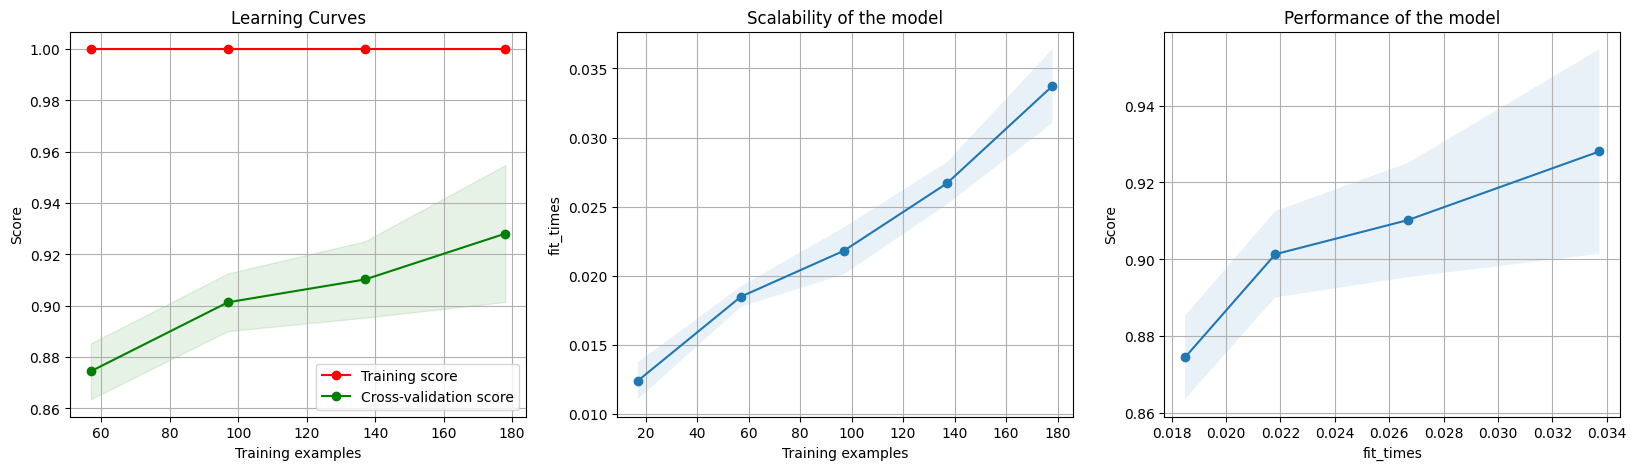

In [45]:
plot_learning_curve(best_classifier_1, 'Learning Curves',
                    X_train_cleaned_bow, y_train, n_jobs=-1)

In [46]:
def final_pipeline(pipeline,cleaned_text):
    predictions = pipeline.predict(cleaned_text)
    return predictions
y_test_pred = final_pipeline(best_classifier_1,X_test_cleaned_bow)

In [ ]:
import sklearn.metrics as metrics
print('\nTest set classification report:\n\n',
      metrics.classification_report(y_test, y_test_pred))